# <center> Michael Stephens </center>

## <center> "Off Facebook Activity" Report </center>

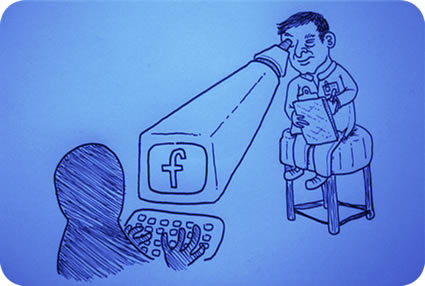

### <center> My hypothesis at the outset of this data report is that, given the fact that I primarily use social media to follow bands, musicians, record labels, podcasts, DJs, and venues I'm interested in, I would anticipate the majority of the "off Facebook data" that Facebook has collected about me would also be related to music. </center>

To test my hypothesis via data manipulation, I plan to sort the data by number of events for each app, then eliminate any apps with extremely low usage.<font size="1">$^{1}$</font>

Next, I will classify the apps with higher event values as either "music" or "nonmusic".  

Finally, I plan to run a t-test to compare the two classifications against one another.  Per my hypothesis, I expect apps classified as "music" to have a higher average number of events than the "nonmusic" apps.


<font size="1">(1) An app with a very small amount of events may be indicative of an app I tried but didn't like, a misclick, or even someone else using a computer when I've forgotten to log out of Facebook, and in my opinion should be treated as outliers rather than as part of my data set.</font>

###### Step 1 is to import needed libraries, explore the data structure, and create the data frame:

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [5]:
with open (r"C:\Users\waxen\Desktop\facebook-mikaelstevensson\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

In [6]:
type(act['off_facebook_activity'])

list

In [7]:
act['off_facebook_activity'][0]

{'name': 'Spotify: Listen to podcasts & find music you love',
 'events': [{'id': 174829003346,
   'type': 'ACTIVATE_APP',
   'timestamp': 1612744560}]}

In [10]:
data = pd.DataFrame(act['off_facebook_activity'])
print(data)

                                                  name  \
0    Spotify: Listen to podcasts & find music you love   
1                                              GroupMe   
2                                        streamlink.to   
3    Grubhub: Local Food Delivery & Restaurant Takeout   
4                                  thegreatcourses.com   
..                                                 ...   
312                            clevelandjewishnews.com   
313                                           6abc.com   
314                                            edf.org   
315                                    cardkingdom.com   
316                                         zillow.com   

                                                events  
0    [{'id': 174829003346, 'type': 'ACTIVATE_APP', ...  
1    [{'id': 127221877343651, 'type': 'CUSTOM', 'ti...  
2    [{'id': 831119970982733, 'type': 'PAGE_VIEW', ...  
3    [{'id': 127001397311144, 'type': 'CUSTOM', 'ti...  
4    [{'id': 16191

###### With the data frame established, I can create a loop to count the number of each type of event and the total number of events per app.

In [14]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [15]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,Spotify: Listen to podcasts & find music you love,1,1,0,0,0,0,0
1,GroupMe,187,14,173,0,0,0,0
2,streamlink.to,2,0,0,0,0,0,2
3,Grubhub: Local Food Delivery & Restaurant Takeout,5,0,3,0,0,0,0
4,thegreatcourses.com,9,0,0,0,0,0,9


### Right off the bat, I can see something doesn't look right.

##### Knowing my history and usage, one lonely event for *Spotify* doesn't seem possible.  I'll have to keep this in mind as I move forward. 

###### For now, I'll continue by creating a table to display all apps with an event count 5 or greater:

In [16]:
from scipy import stats

In [112]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views']].loc[appbyevent['Event Count'] > 4]
sub_apps

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
1,GroupMe,187,14,173,0,0,0,0
3,Grubhub: Local Food Delivery & Restaurant Takeout,5,0,3,0,0,0,0
4,thegreatcourses.com,9,0,0,0,0,0,9
7,loudwire.com,6,0,2,0,1,0,3
13,vice.com,11,0,1,0,8,0,2
18,npr.org,5,0,0,0,2,0,3
20,Spotify: Listen to new music and play podcasts,43,39,4,0,0,0,0
21,theatlantic.com,16,0,9,0,6,0,1
22,Fitbit,102,12,90,0,0,0,0
28,forbes.com,9,0,0,0,5,0,4


## Houston, We Have A Problem

####    Upon reviewing the data in these tables, we see *Spotify* listed multiple times.

The app named ***Spotify: Listen to new music, podcasts, and songs*** has over 200 events, whereas the app named ***Spotify: Listen to podcasts & find music you love*** has only 1.  Further, ***Spotify: Listen to new music and play podcasts*** has 43 events, and ***Spotify: Discover new music, podcasts, and songs*** has an additional 17.  

Two possible reasons come to mind: either *Spotify* has different apps with different names that send data to Facebook under different circumstances, or *Spotify* has changed the name of the app as it reports to Facebook several times during the time I've been using both apps.  

This makes me uncomfortable with my original approach of eliminating low-event-volume apps and working with the top apps only, since now it is conceivable that there may be 150 different *Spotify* apps with 1 or 2 events each, which would massively alter my data. 

###### The first step to solving this problem is to identify exactly how many different Spotify apps exist within in my data.

In [113]:
data[data['name'].str.contains('Spotify')]

,name,events
0,Spotify: Listen to podcasts & find music you love,"[{'id': 174829003346, 'type': 'ACTIVATE_APP', ..."
20,Spotify: Listen to new music and play podcasts,"[{'id': 174829003346, 'type': 'ACTIVATE_APP', ..."
71,"Spotify: Listen to new music, podcasts, and songs","[{'id': 174829003346, 'type': 'ACTIVATE_APP', ..."
112,Spotify,"[{'id': 1901136573502950, 'type': 'PAGE_VIEW',..."
246,"Spotify: Discover new music, podcasts, and songs","[{'id': 174829003346, 'type': 'CUSTOM', 'times..."


###### Lines 0, 20, 71, and 246 are all represented in the prior output tables, so I only need to find the number of events in Line 112:

In [114]:
zerothRow = data.loc[[112]]
with pd.option_context('display.max_colwidth', None):
    print(zerothRow)

        name  \
112  Spotify   

                                                                       events  
112  [{'id': 1901136573502950, 'type': 'PAGE_VIEW', 'timestamp': 1589036520}]  


###### There is only one event in the Line 112 app named "Spotify", and only 5 different Spotify apps in my data frame.

I'm now feeling comfortable returning to my original plan, since eliminating apps with low volume of events will only eliminate 2 *Spotify* apps, each with only 1 event.  This seems unlikely to skew my data, and is in the spirit of removing outliers. 

Here is, again, the table of apps which have 5 or more events.  

In [117]:
sub_apps

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
1,GroupMe,187,14,173,0,0,0,0
3,Grubhub: Local Food Delivery & Restaurant Takeout,5,0,3,0,0,0,0
4,thegreatcourses.com,9,0,0,0,0,0,9
7,loudwire.com,6,0,2,0,1,0,3
13,vice.com,11,0,1,0,8,0,2
18,npr.org,5,0,0,0,2,0,3
20,Spotify: Listen to new music and play podcasts,43,39,4,0,0,0,0
21,theatlantic.com,16,0,9,0,6,0,1
22,Fitbit,102,12,90,0,0,0,0
28,forbes.com,9,0,0,0,5,0,4


###### Applying a new category to each app, defining it as either "music" or "nonmusic" will allow me to run the t-test comparing the two.

In [124]:
cats = ['music', 'nonmusic', 'nonmusic', 'music', 'nonmusic', 'nonmusic', 'music', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'music', 'nonmusic', 'nonmusic', 'nonmusic', 'music', 'music', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'music', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'nonmusic', 'music', 'nonmusic', 'music', 'nonmusic', 'nonmusic', 'nonmusic']
cats

['music',
 'nonmusic',
 'nonmusic',
 'music',
 'nonmusic',
 'nonmusic',
 'music',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'music',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'music',
 'music',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'music',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'nonmusic',
 'music',
 'nonmusic',
 'music',
 'nonmusic',
 'nonmusic',
 'nonmusic']

###### Outputting the table one more time, with the new categories:

In [125]:
sub_apps['category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,category
1,GroupMe,187,14,173,0,0,0,0,music
3,Grubhub: Local Food Delivery & Restaurant Takeout,5,0,3,0,0,0,0,nonmusic
4,thegreatcourses.com,9,0,0,0,0,0,9,nonmusic
7,loudwire.com,6,0,2,0,1,0,3,music
13,vice.com,11,0,1,0,8,0,2,nonmusic
18,npr.org,5,0,0,0,2,0,3,nonmusic
20,Spotify: Listen to new music and play podcasts,43,39,4,0,0,0,0,music
21,theatlantic.com,16,0,9,0,6,0,1,nonmusic
22,Fitbit,102,12,90,0,0,0,0,nonmusic
28,forbes.com,9,0,0,0,5,0,4,nonmusic


###### And finally, running the t-tests:

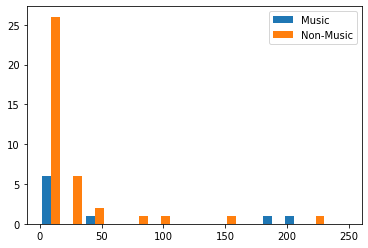

In [155]:
bins = np.linspace(0, 250, 15)
apps = sub_apps['Event Count'].loc[sub_apps['category'] == 'music']
sites = sub_apps['Event Count'].loc[sub_apps['category'] == 'nonmusic']
plt.hist([apps, sites], bins, label = ['Music', 'Non-Music'])
plt.legend(loc = 'upper right')
plt.show()

In [134]:
ttest_eventcount = stats.ttest_ind(sub_apps['Event Count'].loc[sub_apps['category'] == 'music'], sub_apps['Event Count'].loc[sub_apps['category'] == 'nonmusic'])
ttest_eventcount.statistic

1.510290128906283

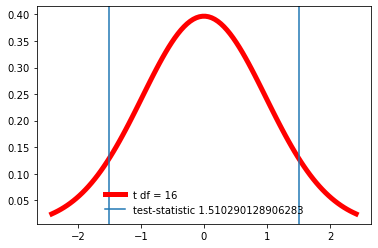

In [135]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest_eventcount.statistic, label = 'test-statistic 1.510290128906283')
ax1.axvline(x=-ttest_eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [136]:
ttest_eventcount.pvalue

0.13795999640898887

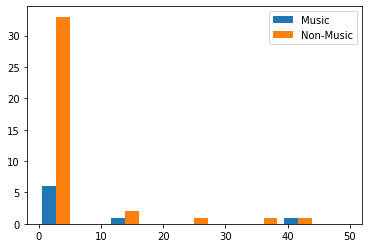

In [151]:
bins = np.linspace(0, 50, 10)
apps = sub_apps['Activate App'].loc[sub_apps['category'] == 'music']
sites = sub_apps['Activate App'].loc[sub_apps['category'] == 'nonmusic']
plt.hist([apps, sites], bins, label = ['Music', 'Non-Music'])
plt.legend(loc = 'upper right')
plt.show()

In [140]:
ttest_activateapp = stats.ttest_ind(sub_apps['Activate App'].loc[sub_apps['category'] == 'music'], sub_apps['Activate App'].loc[sub_apps['category'] == 'nonmusic'])
ttest_activateapp

Ttest_indResult(statistic=2.3407938848569434, pvalue=0.02373388340914133)

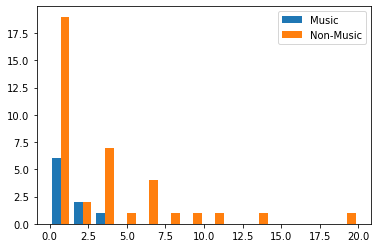

In [152]:
bins = np.linspace(0, 20, 15)
apps = sub_apps['View Content'].loc[sub_apps['category'] == 'music']
sites = sub_apps['View Content'].loc[sub_apps['category'] == 'nonmusic']
plt.hist([apps, sites], bins, label = ['Music', 'Non-Music'])
plt.legend(loc = 'upper right')
plt.show()

In [154]:
ttest_viewcontent = stats.ttest_ind(sub_apps['View Content'].loc[sub_apps['category'] == 'music'], sub_apps['View Content'].loc[sub_apps['category'] == 'nonmusic'])
ttest_viewcontent

Ttest_indResult(statistic=-1.4623113242090977, pvalue=0.15060520171892058)

###### Given the low p-value, the t-test tells us that it is extremely unlikely that the two categories have an equal distribution.

## Conclusion:

There are definitely some aspects of this data that came as a surprise to me.  I expected music to be the runaway leader in events, but it's not quite as clear cut as I'd thought.  I don't usually create accounts for apps using my facebook login for privacy reasons; I usually use a burner Email, but I'd forgotten about the 3-month Noom trial for which I signed up through Facebook, and that ran up a lot of non-music activity really quickly.  

The real shocking data point, however, is that the largest single app in terms of events is actually Samsung Pay-- which I don't ever open or use; *I've never even set it up.*

I'm at a loss to explain what this data means or where it may have originated.  Searching for an answer, I found an article from 2018 describing how Google and Mastercard are in cahoots (https://www.theverge.com/2018/8/30/17801880/google-mastercard-data-online-ads-offline-purchase-history-privacy), but this can't be exactly the answer either, as I don't click on ads.

In fact, I don't even see ads.  

Across all of my "Off Facebook Data", there is not a single Ad Request.  This is because I run Ad Blocking software, enhanced privacy extensions in all my browsers, and software that blocks social media buttons, 3rd party cookies, and Pixels across all sites I visit.  The low number of Ad Requests is not surprising to me, but the fact that I have zero is actually impressive.

Finally, the small number of music-related data points was surprising to me, until, after reviewing the data, I considered some more aspects to how I use technology.  Due to addictive doomscrolling, I deleted the FaceBook app from my phone years ago.  So since that means I'm usually on a non-mobile computer whenever I open a link in Facebook, I open it in a new browser tab within one of my tightly-locked-down browsers.  This probably really skews my numbers in a way that wouldn't be knowable unless I removed the extra security extensions from my browsers, then collected and compared that FaceBook data to my current set. 

Finally, I do, to some extent, segregate different activities across my different devices.  I only do banking and bill paying on my desktop PC for example, never on my laptop or my phone, and I never log in to social media on the desktop.  If I'm on social media, I'm likely on my laptop, because I don't have the app on my phone and won't sign in on my desktop.  And if I'm listening to, or searching out, music, it's either on desktop or on my phone because I hate the tinny sound of my laptop speakers.  Again, this probably skews my data in unpredictable ways.

This was definitely an interesting dive into what FaceBook sees, and what its blind spots may be, based on personal peculiarities of individual users and their habits.  I was fairly certain what I was going to see in my data, and am very surprised how wrong I was.